In [205]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Статистическая задача

In [206]:
num_samples = 20

In [207]:
def get_uniform_samples(n):
    uniform_rv = sps.uniform(0, 10)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(uniform_rv.rvs(n))
    
    return np.array(all_samples)

In [208]:
def get_mp_ests(samples):
    mp_ests = np.zeros((num_samples))
    for i in range(len(samples)):
        mp_ests[i] = samples[i].mean()
        
    return mp_ests

In [209]:
def get_medians(samples):
    medians = np.zeros((num_samples))
    for i in range(len(samples)):
        medians[i] = np.median(samples[i])
        
    return medians

In [210]:
def get_estms_stats(esmts):
    mn = esmts.min()
    mx = esmts.max()
    w = mx - mn
    std_dev = statistics.stdev(esmts)
    
    return mn, mx, w, std_dev

def print_stats(name, n, estms):
    mn, mx, w, std = get_estms_stats(estms)
    print('n = {:d}, {}: amin = {:.2f}, amax = {:.2f}, w = {:.2f}, Sa = {:.2f}'.format(n, name, mn, mx, w, std))

In [211]:
def get_estmts_stats_for_num(n):
    samples = get_uniform_samples(n)
    moments = get_mp_ests(samples) * 2
    mp = np.array([(n+1)/n * s.max() for s in samples])
    medians = get_medians(samples) * 2
    if n == 10:
        print(np.round(samples[:5], 3))
        print('Значения оценок на k=20 выборках:')
        print('Оценки метода моментов:\n', np.round(moments, 3))
        print('Оценки максимального правдоподобия:\n', np.round(mp, 3))
        print('Медианные оценки:\n', np.round(medians, 3))
        print()
    print_stats('a1', n, moments)
    print_stats('a2', n, mp)
    print_stats('a3', n, medians)
    print()
    
    return moments, mp, medians

In [212]:
a1_10, a2_10, a3_10 = get_estmts_stats_for_num(10)
a1_40, a2_40, a3_40 = get_estmts_stats_for_num(40)
a1_160, a2_160, a3_160 = get_estmts_stats_for_num(160)

[[8.533 8.79  7.951 6.058 7.418 8.145 5.62  0.053 4.752 5.197]
 [4.133 0.765 5.176 4.82  2.441 8.363 4.255 6.542 0.42  3.206]
 [6.013 7.814 3.208 4.278 8.069 3.642 1.28  6.772 6.45  0.969]
 [3.409 1.759 0.474 5.572 6.381 0.377 7.361 5.508 1.119 5.7  ]
 [6.378 3.743 0.571 7.374 8.936 3.141 2.844 5.033 1.618 8.039]]
Значения оценок на k=20 выборках:
Оценки метода моментов:
 [12.503  8.025  9.699  7.532  9.536 14.902  9.012 12.403 10.442  9.342
 12.418 11.3   11.771 12.485 10.903  8.051  9.598 10.784  7.875  9.48 ]
Оценки максимального правдоподобия:
 [ 9.669  9.2    8.876  8.097  9.829 10.99   8.979 10.001 10.647  7.524
 10.471  9.342  9.737 10.984 10.974  9.181 10.356 10.299  8.356 10.26 ]
Медианные оценки:
 [13.475  8.389 10.291  8.917  8.776 15.583  7.766 16.179  9.425  9.942
 11.582 11.25  12.044 13.041  9.938  7.941  8.989 12.776  7.43   8.778]

n = 10, a1: amin = 7.53, amax = 14.90, w = 7.37, Sa = 1.94
n = 10, a2: amin = 7.52, amax = 10.99, w = 3.47, Sa = 0.99
n = 10, a3: amin = 7.

In [213]:
def draw_estms(a2, a3, flabel, slabel):
    x = np.linspace(0, num_samples, num_samples)
    plt.plot(x, a2, label=flabel)
    plt.plot(x, a3, label=slabel)
    plt.xlabel('Номер выборки')
    plt.ylabel('Значение оценки')
    plt.legend()

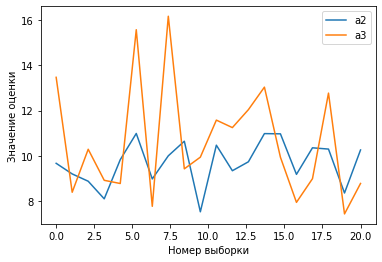

In [214]:
draw_estms(a2_10, a3_10, 'a2', 'a3')

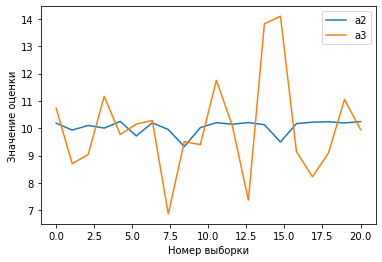

In [215]:
draw_estms(a2_40, a3_40, 'a2', 'a3')

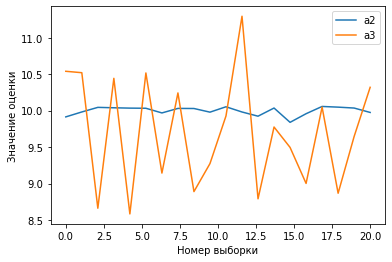

In [216]:
draw_estms(a2_160, a3_160, 'a2', 'a3')

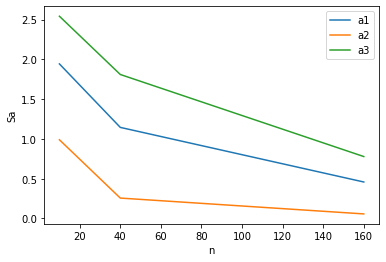

In [217]:
def get_std(list_estms):
    return list(map(statistics.stdev, list_estms))

x = [10, 40, 160]
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
y3 = get_std([a3_10, a3_40, a3_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.plot(x, y3, label='a3')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

## Задание для самостоятельной работы

### Оценка среднего нормального распределения

In [218]:
def get_normal_samples(n):
    normal = sps.norm(loc=0, scale=1)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(normal.rvs(n))
        
    return np.array(all_samples)

In [219]:
def get_estmts_stats_for_num(n):
    samples = get_normal_samples(n)
    mp = get_mp_ests(samples)
    medians = get_medians(samples)
    if n == 10:
        print(samples[:5])
        print('Значения оценок на k=20 выборках:')
        print('Оценки максимального правдоподобия: ', mp)
        print('Медианные оценки: ', medians)
        print()
    print_stats('a1', n, mp)
    print_stats('a2', n, medians)
    print()
    
    return mp, medians

In [220]:
a1_10, a2_10 = get_estmts_stats_for_num(10)
a1_40, a2_40 = get_estmts_stats_for_num(40)
a1_160, a2_160 = get_estmts_stats_for_num(160)

[[ 0.63905839  1.30969192 -0.8937918   0.72998431 -0.57109907 -0.63971992
  -0.8722984   1.30113757 -1.90153179  0.19655007]
 [ 1.20209217 -1.15115019  0.47874807  1.53249966 -1.91616631  0.04103882
  -1.10046972  0.30799376  0.95465051 -1.62659559]
 [ 0.41939228 -1.15668724 -0.08539528 -0.60030942  0.89422741  0.01387339
   1.79123093 -1.19674833  0.62678683  1.12482597]
 [-0.34509698 -0.65965385  0.08293873  1.6794831   1.54664567 -1.11308994
  -1.52199719 -0.96149543 -0.21839242 -1.47185718]
 [ 0.32283427  1.76382984  0.99395936  1.11078045  0.70523003  0.35138587
  -1.3610102   2.08371391  0.52027723  0.84959157]]
Значения оценок на k=20 выборках:
Оценки максимального правдоподобия:  [-7.02018712e-02 -1.27735881e-01  1.83119655e-01 -2.98251550e-01
  7.34059232e-01  8.15386272e-02  2.42109750e-02 -3.04655936e-01
 -3.04710827e-02  2.23952068e-01  2.11363917e-01 -5.25283328e-01
  2.52031968e-01  4.03123055e-01  4.26360168e-04  3.31735548e-01
  2.81629285e-01 -2.81677876e-01  2.1909311

In [221]:
def draw_estms(a2, a3, flabel, slabel):
    x = np.linspace(0, num_samples, num_samples)
    plt.axis([-1, 21, -1, 1])
    plt.plot(x, a2, label=flabel)
    plt.plot(x, a3, label=slabel)
    plt.xlabel('Номер выборки')
    plt.ylabel('Значение оценки')
    plt.legend()

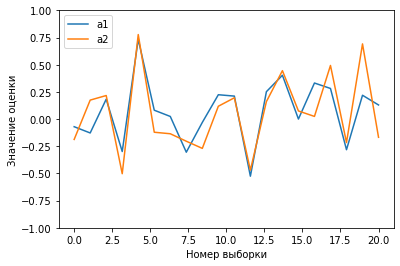

In [222]:
draw_estms(a1_10, a2_10, 'a1', 'a2')

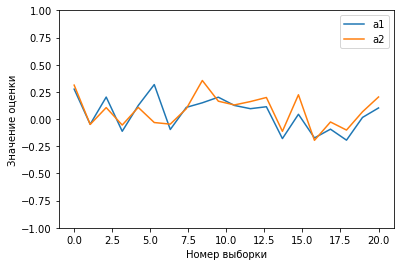

In [223]:
draw_estms(a1_40, a2_40, 'a1', 'a2')

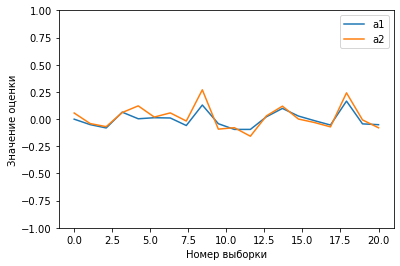

In [224]:
draw_estms(a1_160, a2_160, 'a1', 'a2')

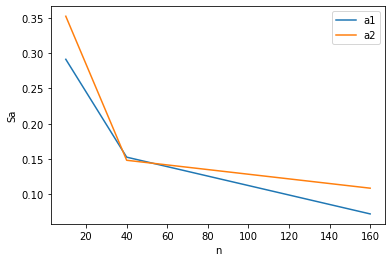

In [225]:
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

### Оценка параметра показательного распределения

In [226]:
def get_expon_samples(n):
    expon_rv = sps.expon(scale=0.2)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(expon_rv.rvs(n))
    
    return np.array(all_samples)

In [227]:
def get_estmts_stats_for_num(n):
    samples = get_expon_samples(n)
    mp = np.array([n / s.sum() for s in samples])
    medians = np.log(2) / get_medians(samples)
    if n == 10:
        print(samples[:5])
        print('Значения оценок на k=20 выборках:')
        print('Оценки максимального правдоподобия: ', mp)
        print('Медианные оценки: ', medians)
        print()
    print_stats('a1', n, mp)
    print_stats('a2', n, medians)
    print()
    
    return mp, medians

In [228]:
def draw_estms(a2, a3, flabel, slabel):
    x = np.linspace(0, num_samples, num_samples)
    plt.axis([-1, 21, 0, 20])
    plt.plot(x, a2, label=flabel)
    plt.plot(x, a3, label=slabel)
    plt.xlabel('Номер выборки')
    plt.ylabel('Значение оценки')
    plt.legend()

In [229]:
a1_10, a2_10 = get_estmts_stats_for_num(10)
a1_40, a2_40 = get_estmts_stats_for_num(40)
a1_160, a2_160 = get_estmts_stats_for_num(160)

[[0.3062553  0.02195913 0.11970055 0.19054795 0.19468119 0.0225469
  0.03077631 0.28194555 0.31908117 0.12245076]
 [0.08281929 0.12396336 0.04962127 0.24063341 0.63847116 0.13433754
  0.04060074 0.03918183 0.08148103 0.32132292]
 [0.52888639 0.02749669 0.02701312 0.08850617 0.02619558 0.05062292
  0.0724621  0.18202981 0.1588619  0.00968956]
 [0.31008812 0.55605791 0.29444998 0.39549554 0.18351403 0.17155841
  0.13503527 0.1154082  0.00124028 0.23434685]
 [0.15243128 0.13019518 0.06164288 0.06891059 0.08893292 0.05555262
  0.08498838 0.16576442 0.01515    0.08693169]]
Значения оценок на k=20 выборках:
Оценки максимального правдоподобия:  [ 6.21139306  5.70635379  8.53413981  4.17154287 10.98297684  4.39300654
  5.04508113  4.66593854  4.44023549  3.83561443  3.29813135  7.26037366
  5.06957194  3.70907549  4.78108141  4.8867367   6.87575662  5.15739731
  7.57397987  5.68406937]
Медианные оценки:  [ 4.42907373  6.70411381 11.26290029  3.31759788  8.06359793  3.54840991
  3.67487074  3.4

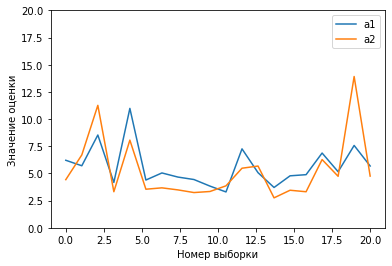

In [230]:
draw_estms(a1_10, a2_10, 'a1', 'a2')

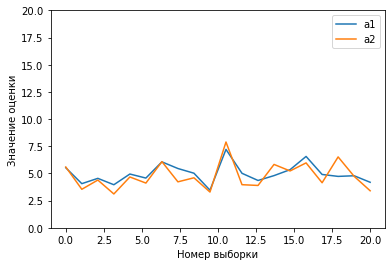

In [231]:
draw_estms(a1_40, a2_40, 'a1', 'a2')

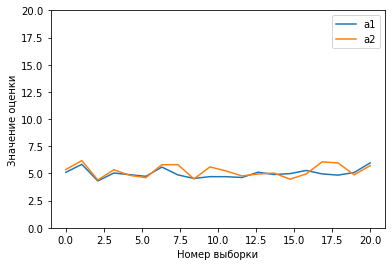

In [232]:
draw_estms(a1_160, a2_160, 'a1', 'a2')

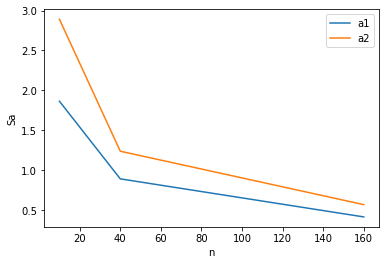

In [233]:
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

## Решение задачи

Количество производственных травм за время T является случайной величиной, распределенной по закону Пуассона с параметром a=λT. Поквартальные данные за k=5 лет оказались x1,x2,…,x20. Если за год число травм оказывается равным N=30 и более, завод подвергается штрафу и проверке. Оценить вероятность этого события в следующем году. Поквартальные данные получить моделированием; среднее значение принять m=6.

In [241]:
def calc_cdf(n, a):
    res = 0
    for k in range(n):
        res += (4*a)**k / (math.factorial(k)) * np.exp(-4*a)
    
    return res

In [260]:
sample = sps.poisson.rvs(6, size=20)
print(sample)
lambd = sample.mean()
print('Оценка параметра lambda:', lambd)
print(round(calc_cdf(30, lambd), 3), round(1-calc_cdf(30, lambd), 3))
print('P{N >= 30} = 1 - P{N < 30} = 1 - Fp(30) =', round(1 - calc_cdf(30, lambd), 3))

[5 8 2 4 5 7 4 5 7 7 5 6 6 9 7 4 6 4 6 5]
Оценка параметра lambda: 5.6
0.928 0.072
P{N >= 30} = 1 - P{N < 30} = 1 - Fp(30) = 0.072
